In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
import scipy.stats as scs
# data dumb store
import joblib
# to locate yaml file
import yaml
# to locate directore
import os

# Case

- Objective: Bank wants to increase the number of deposite by optimizing data-driven marketing strategy
- Concern: Long term revenue growth --> Interpretability

# Load Training Dataset

In [2]:
x_train = joblib.load("data/raw/x_train.pkl")
y_train = joblib.load("data/raw/y_train.pkl")

In [3]:
dataset = pd.concat([x_train, y_train], axis = 1)
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6092,39,housemaid,married,tertiary,no,94,no,no,cellular,6,aug,181,2,-1,0,unknown,no
9938,32,technician,married,secondary,no,465,yes,no,cellular,12,may,210,2,-1,0,unknown,no
1337,70,retired,married,secondary,no,6422,no,no,cellular,10,mar,122,1,-1,0,unknown,yes
10882,47,management,married,secondary,no,1144,no,yes,cellular,29,jan,324,1,-1,0,unknown,no
9216,56,blue-collar,married,unknown,no,665,yes,no,unknown,20,jun,109,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,37,management,married,tertiary,no,3236,no,no,cellular,20,may,291,2,202,5,other,yes
2759,54,blue-collar,married,primary,no,1311,no,no,telephone,15,oct,485,3,184,3,failure,yes
9097,30,technician,married,secondary,no,207,yes,no,unknown,23,may,72,2,-1,0,unknown,no
9743,41,blue-collar,married,secondary,no,393,yes,yes,cellular,10,jul,122,1,-1,0,unknown,no


# Exploratory Data Anlaysis

## Check Missing Values

In [4]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Check Stats

In [5]:
dataset.skew()

/var/folders/v4/0_xjmlhs3g97b1210d3fl8y80000gn/T/ipykernel_3952/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


age         0.847835
balance     7.747870
day         0.104123
duration    2.100343
campaign    6.080690
pdays       2.387643
previous    7.332606
dtype: float64

In [6]:
# almost all continous data is skew

In [7]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,6697.000000,6697.000000,6697.00000,6697.000000,6697.000000,6697.000000,6697.000000
mean,41.059728,1486.243094,15.71659,370.626400,2.499328,51.728087,0.833956
std,11.793221,2869.049953,8.42996,344.859492,2.797802,108.637662,2.298101
min,18.000000,-1.000000,1.00000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,124.000000,8.00000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,557.000000,16.00000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1693.000000,22.00000,496.000000,3.000000,35.000000,1.000000
max,93.000000,81204.000000,31.00000,3284.000000,63.000000,842.000000,55.000000


## Split by Class

In [8]:
dataset_deposit = dataset[dataset['deposit']=="yes"]
dataset_no_deposit = dataset[dataset['deposit']=="no"]

In [9]:
dataset_deposit.describe().T[["mean", "50%"]]

,mean,50%
age,41.440277,38.0
balance,1773.539552,747.0
day,15.181532,15.0
duration,532.589032,419.0
campaign,2.115979,2.0
pdays,68.812165,-1.0
previous,1.137094,0.0


In [10]:
dataset_no_deposit.describe().T[["mean", "50%"]]

,mean,50%
age,40.717083,39.0
balance,1227.562145,414.0
day,16.198354,17.0
duration,224.795687,162.0
campaign,2.844495,2.0
pdays,36.345630,-1.0
previous,0.561010,0.0


In [11]:
# balance diantara 2 kelas memiliki perbedaan mean yang besar
# pdays diantara 2 kelas memiliki perbedaan mean yang besar
# duration diantara 2 kelas memiliki perbedaan mean yang besar

## Kdeplot

In [12]:
num = dataset.select_dtypes(include="number").columns

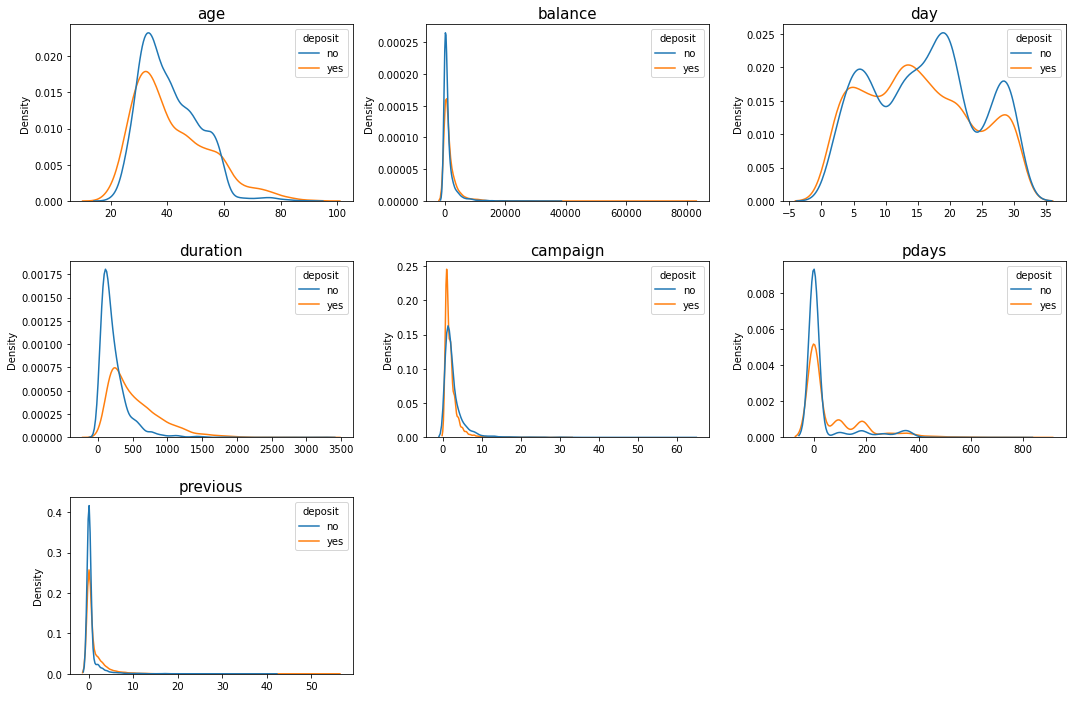

In [13]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=dataset[num[i]], hue=dataset['deposit'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

## Boxplot

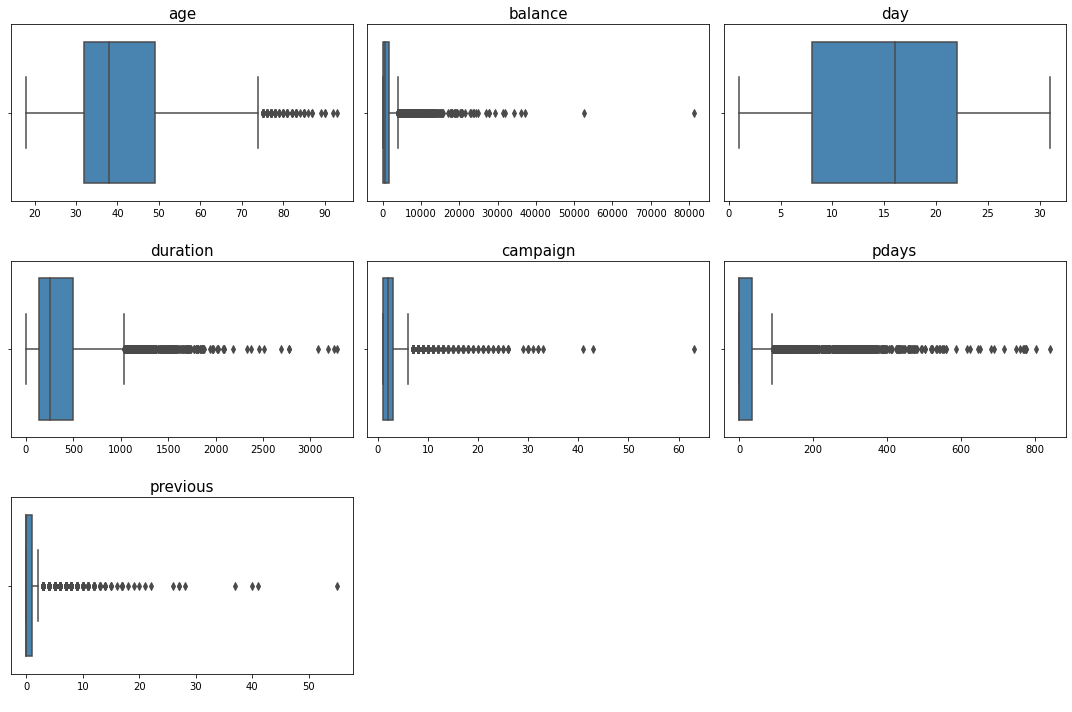

In [14]:
plt.figure(figsize=(15,10))
for i in range(0, len(num)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=dataset[num[i]], palette='Blues_d')
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

- We'll try to use original data instead of removing the outliers in the first trial

## Countplot

In [15]:
cat = dataset.select_dtypes(include='object').columns

In [16]:
len(cat)

10

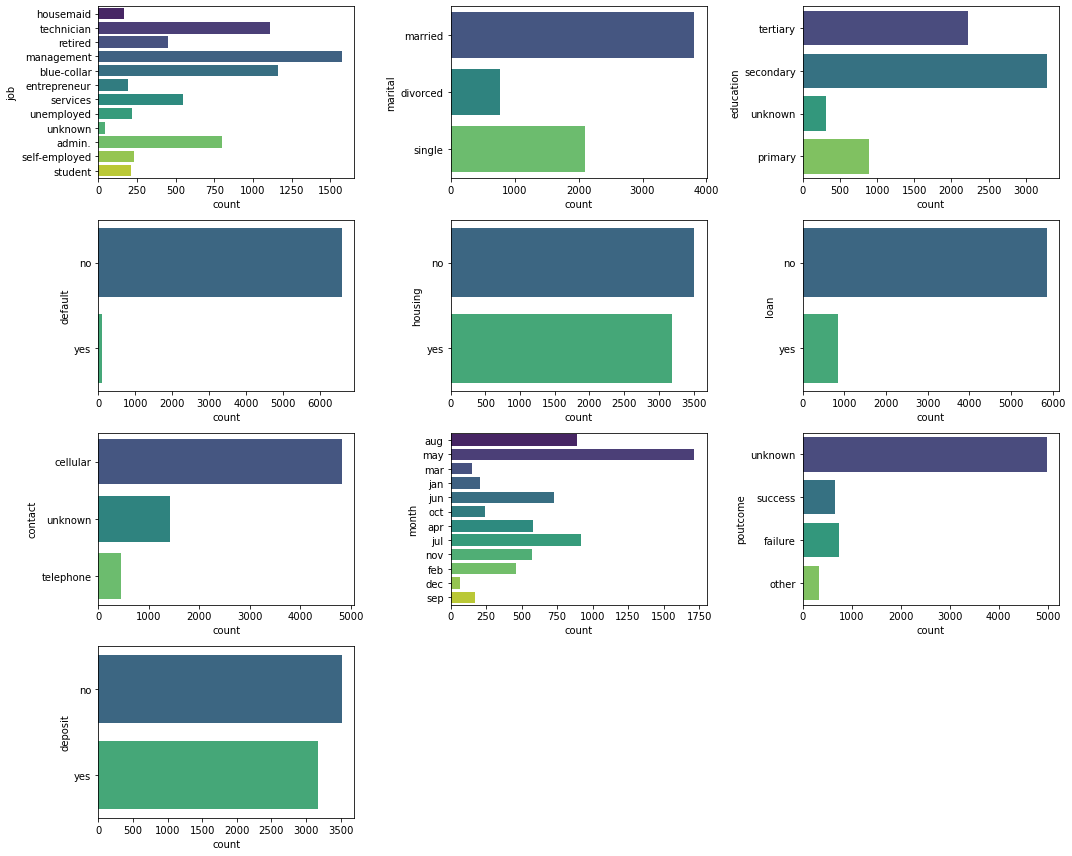

In [17]:
fig, axes = plt.subplots(4,3, figsize=(15,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0)]

for i in range(len(cat)):
    sns.countplot(y=dataset[cat[i]], palette='viridis', ax=axes[xy[i]])
    axes[3,1].axis('off')
    axes[3,2].axis('off')
    plt.tight_layout() 

- FP --> predict deposite, alsinya gak
- FN --> predict no, aslinya deposit

- yg diprediksi depoite --> dikasih treatment marketing biar makin yaquin deposit
- FP tinggi, marketingnya boncos
- FN tinggi, kehilangan potensi customer --> berat disini (recall)

- recall:
- TP/ FN + TP

## Correlation plot

In [27]:
data_corr = dataset.copy()
data_corr['deposit'] = np.where(data_corr['deposit'] == "no", 0,1)

In [28]:
data_corr['deposit'].unique()

array([0, 1])

<AxesSubplot:>

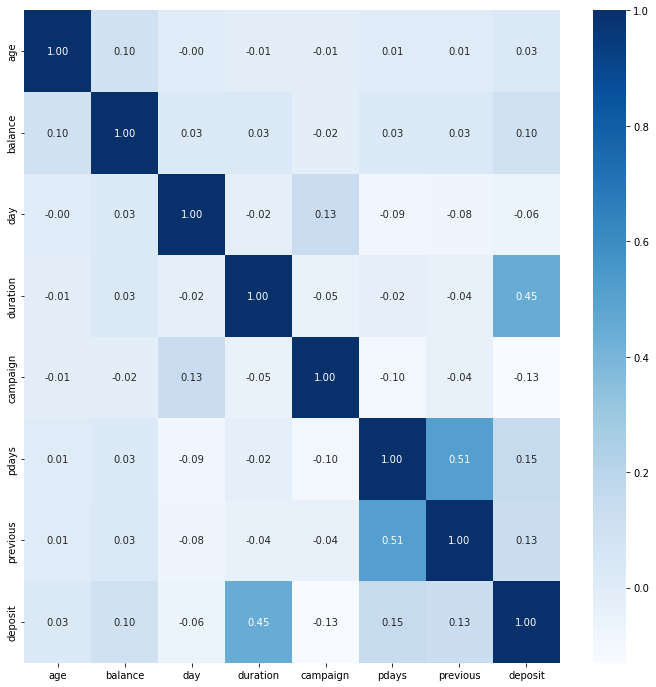

In [29]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 12))
sns.heatmap(data_corr.corr(), cmap='Blues', annot=True, fmt='.2f')

## Kesimpulan

- negative value `balance` diimputasi dgn median masing2 kelas
- negative value `pdays` di imputasi dgn 0